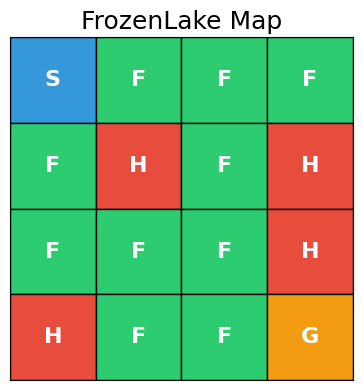

In [9]:
import gymnasium as gym
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the environment
env = gym.make("FrozenLake-v1", render_mode=None)
desc = env.unwrapped.desc.astype(str)

# Colors for each tile type
tile_colors = {
    'S': '#3498db',  # Blue — Start
    'F': '#2ecc71',  # Green — Frozen lake (safe)
    'H': '#e74c3c',  # Red — Hole
    'G': '#f39c12'   # Orange — Goal
}

# Grid dimensions
nrows, ncols = desc.shape
tile_size = 1

# Create the figure
fig, ax = plt.subplots(figsize=(ncols, nrows))

# Draw each tile
for y in range(nrows):
    for x in range(ncols):
        tile = desc[y, x]
        color = tile_colors.get(tile, 'gray')
        rect = patches.Rectangle((x, nrows - y - 1), tile_size, tile_size,
                                 facecolor=color, edgecolor='black')
        ax.add_patch(rect)
        ax.text(x + 0.5, nrows - y - 1 + 0.5, tile,
                ha='center', va='center', fontsize=16, color='white', weight='bold')

# Axis settings
ax.set_xlim(0, ncols)
ax.set_ylim(0, nrows)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.title("FrozenLake Map", fontsize=18)
plt.tight_layout()
plt.show()


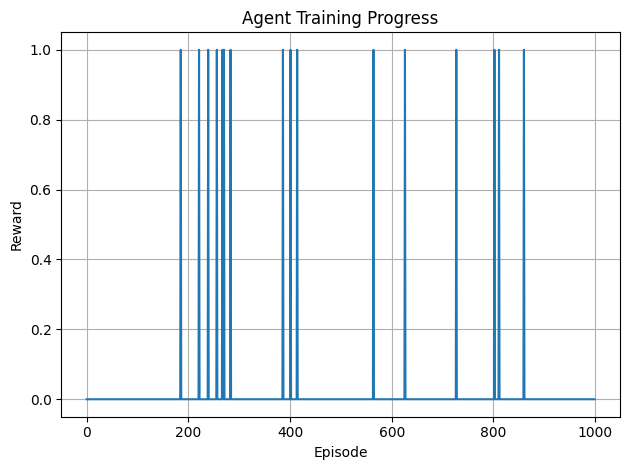


Q-table after training:
[[0.5564 0.5547 0.5085 0.5206]
 [0.5157 0.4065 0.0892 0.4742]
 [0.4387 0.4839 0.4539 0.4523]
 [0.3869 0.3571 0.3977 0.438 ]
 [0.5574 0.1182 0.4911 0.0188]
 [0.     0.     0.     0.    ]
 [0.4538 0.1269 0.3568 0.    ]
 [0.     0.     0.     0.    ]
 [0.0232 0.4997 0.1399 0.5983]
 [0.0274 0.6831 0.6393 0.6296]
 [0.6494 0.03   0.0061 0.574 ]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.7982 0.8466 0.895  0.1337]
 [0.8815 0.8591 0.9504 0.7741]
 [0.     0.     0.     0.    ]]

Episode 1
Step 1: state=0, action=0
Step 2: state=0, action=0
Step 3: state=0, action=0
Step 4: state=0, action=0
Step 5: state=4, action=0
Step 6: state=4, action=0
Step 7: state=4, action=0
Step 8: state=4, action=0
Step 9: state=4, action=0
Step 10: state=4, action=0
Step 11: state=0, action=0
Step 12: state=4, action=0
Step 13: state=4, action=0
Step 14: state=8, action=3
Step 15: state=9, action=1
Step 16: state=13, action=2
Step 17: state=13, action=2
Step 18: state=

In [10]:
# 1. A successful example of training an agent in the FrozenLake environment using Q-learning

import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Environment without rendering for training
env = gym.make("FrozenLake-v1", is_slippery=True)

# Environment parameters
num_states = env.observation_space.n
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))

# Hyperparameters
alpha = 0.8           # learning rate
gamma = 0.95          # discount factor
epsilon = 0.9         # initial ε for exploration
epsilon_decay = 0.995 # ε decay rate
epsilon_min = 0.1     # minimum ε value
episodes = 1000       # number of training episodes
max_steps = 100       # max steps per episode

# For tracking training progress
rewards_per_episode = []

# Training loop
for episode in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done and steps < max_steps:
        action = env.action_space.sample() if np.random.rand() < epsilon else np.argmax(q_table[state])
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )

        state = next_state
        total_reward += reward
        steps += 1

    rewards_per_episode.append(total_reward)

# Plot training progress
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Agent Training Progress")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display Q-table
print("\nQ-table after training:")
print(np.round(q_table, 4))

# Save Q-table to file
with open("q_table.txt", "w", encoding="utf-8") as f:
    f.write("Q-table after training:\n")
    for state in range(q_table.shape[0]):
        row = "\t".join([f"{val:.2f}" for val in q_table[state]])
        f.write(f"State {state}: {row}\n")

# Agent testing with rendering
#env = gym.make("FrozenLake-v1", is_slippery=True, render_mode="rgb_array")
successes = 0
test_episodes = 1000

for episode in range(test_episodes):
    state, _ = env.reset()
    done = False
    steps = 0
    print(f"\nEpisode {episode + 1}")

    while not done and steps < max_steps:
        action = np.argmax(q_table[state])
        print(f"Step {steps + 1}: state={state}, action={action}")
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        steps += 1

    print(f"Result: {'Success' if reward == 1.0 else 'Failure'}")
    if reward == 1.0:
        successes += 1

print(f"\nSuccessful episodes out of {test_episodes}: {successes}")


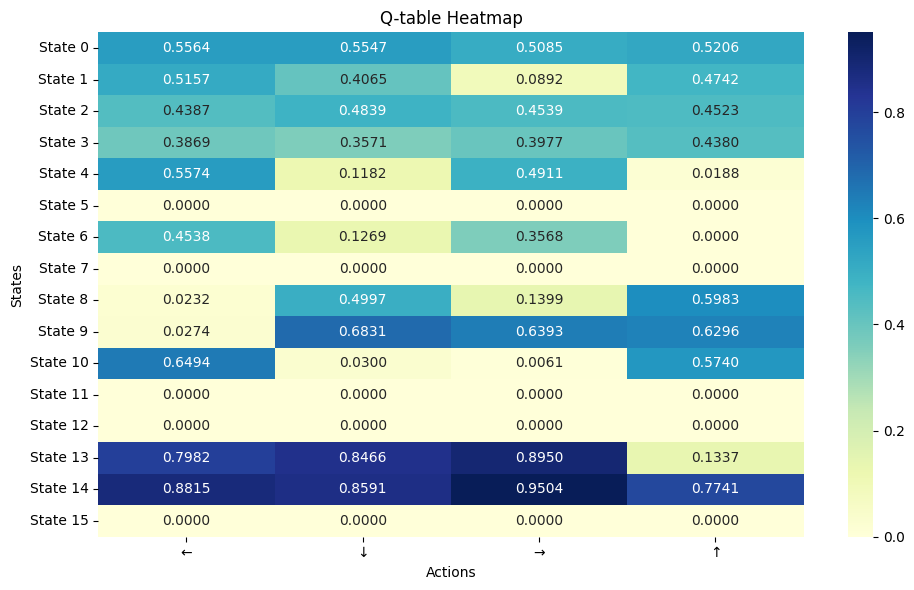

In [11]:
# Visualization setup
plt.figure(figsize=(10, 6))
sns.heatmap(q_table, annot=True, cmap="YlGnBu", fmt=".4f",
            xticklabels=["←", "↓", "→", "↑"],
            yticklabels=[f"State {i}" for i in range(q_table.shape[0])])
plt.title("Q-table Heatmap")
plt.xlabel("Actions")
plt.ylabel("States")
plt.tight_layout()
plt.show()


Successful episodes out of 1000: 613


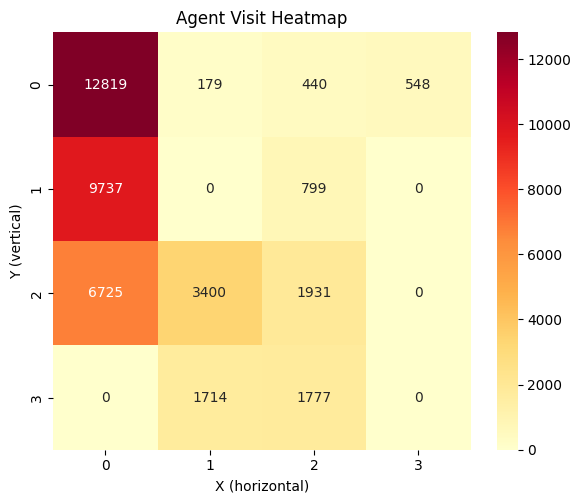

In [12]:
visit_counts = np.zeros(env.observation_space.n)

# Agent testing
test_episodes = 1000
max_steps = 100

for _ in range(test_episodes):
    state, _ = env.reset()
    done = False
    steps = 0

    while not done and steps < max_steps:
        visit_counts[state] += 1
        action = np.argmax(q_table[state])
        state, _, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        steps += 1
    


print(f"\nSuccessful episodes out of {test_episodes}: {successes}")

# Reshape into 4×4 matrix
heatmap = visit_counts.reshape((4, 4))

# Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap, annot=True, cmap="YlOrRd", fmt=".0f", square=True,
            xticklabels=["0", "1", "2", "3"],
            yticklabels=["0", "1", "2", "3"])
plt.title("Agent Visit Heatmap")
plt.xlabel("X (horizontal)")
plt.ylabel("Y (vertical)")
plt.tight_layout()
plt.savefig("frozenlake_heatmap.png")
plt.show()


In [13]:
# 2. Custom reward wrapper

class RewardWrapper(Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.last_state = None  # track previous state

    def reset(self, **kwargs):
        state, info = self.env.reset(**kwargs)
        self.last_state = state
        return state, info

    def step(self, action):
        state, reward, terminated, truncated, info = self.env.step(action)
        done = terminated or truncated

        # Penalty for hitting the wall (agent remains in the same state)
        if state == self.last_state:
            reward -= 1  # wall hit penalty

        # Rewards for episode termination
        if done:
            if reward == 1.0:
                reward = 50.0  # success
            else:
                reward = -1.0  # failure
        else:
            reward -= 0.1  # small penalty for each step

        self.last_state = state
        return state, reward, terminated, truncated, info

# Create environment
env = gym.make("FrozenLake-v1", is_slippery=True)

# Environment parameters
num_states = env.observation_space.n
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))

# Hyperparameters
alpha = 0.8           # learning rate
gamma = 0.95          # discount factor
epsilon = 0.99        # initial exploration rate
epsilon_decay = 0.99  # exploration decay
epsilon_min = 0.01    # minimum exploration rate
episodes = 2000       # number of training episodes
max_steps = 100       # max steps per episode

# Track rewards per episode
rewards_per_episode = []

# Training loop
for episode in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done and steps < max_steps:
        action = env.action_space.sample() if np.random.rand() < epsilon else np.argmax(q_table[state])
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )

        state = next_state
        total_reward += reward
        steps += 1

    rewards_per_episode.append(total_reward)

# Plot training progress
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Agent Training Progress")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display Q-table
print("\nQ-table after training:")
print(np.round(q_table, 4))

# Save Q-table to file
with open("q_table.txt", "w", encoding="utf-8") as f:
    f.write("Q-table after training:\n")
    for state in range(q_table.shape[0]):
        row = "\t".join([f"{val:.2f}" for val in q_table[state]])
        f.write(f"State {state}: {row}\n")

# Agent testing with custom reward wrapper
#base_env = gym.make("FrozenLake-v1", is_slippery=True)
#env = RewardWrapper(base_env)

successes = 0
test_episodes = 1000

for episode in range(test_episodes):
    state, _ = env.reset()
    done = False
    steps = 0
    print(f"\nEpisode {episode + 1}")

    while not done and steps < max_steps:
        action = np.argmax(q_table[state])
        print(f"Step {steps + 1}: state={state}, action={action}")
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        steps += 1

    print(f"Result: {'Success' if reward == 1.0 else 'Failure'}")
    if reward == 1.0:
        successes += 1

print(f"\nSuccessful episodes out of {test_episodes}: {successes}")


NameError: name 'Wrapper' is not defined

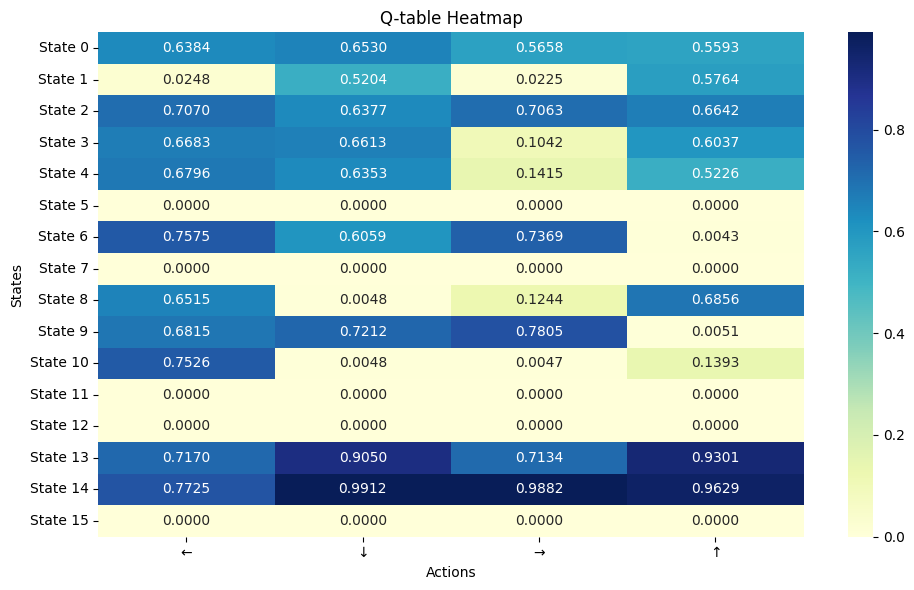

In [ ]:
# Visualization setup
plt.figure(figsize=(10, 6))
sns.heatmap(q_table, annot=True, cmap="YlGnBu", fmt=".4f",
            xticklabels=["←", "↓", "→", "↑"],
            yticklabels=[f"State {i}" for i in range(q_table.shape[0])])
plt.title("Q-table Heatmap")
plt.xlabel("Actions")
plt.ylabel("States")
plt.tight_layout()
plt.show()

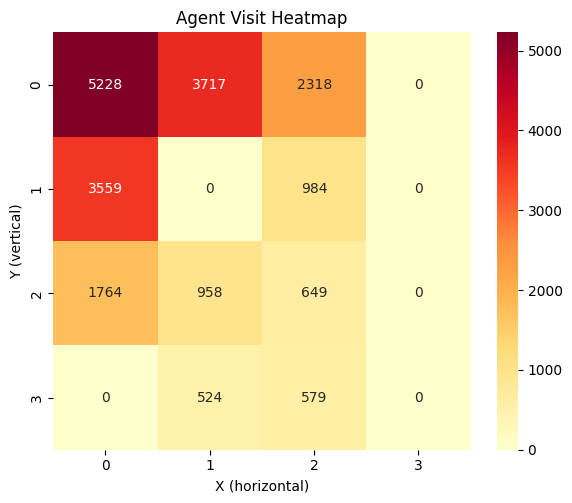

In [194]:
visit_counts = np.zeros(env.observation_space.n)

# Agent testing
test_episodes = 1000
max_steps = 100

for _ in range(test_episodes):
    state, _ = env.reset()
    done = False
    steps = 0

    while not done and steps < max_steps:
        visit_counts[state] += 1
        action = np.argmax(q_table[state])
        state, _, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        steps += 1

# Reshape into 4×4 matrix
heatmap = visit_counts.reshape((4, 4))

# Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap, annot=True, cmap="YlOrRd", fmt=".0f", square=True,
            xticklabels=["0", "1", "2", "3"],
            yticklabels=["0", "1", "2", "3"])
plt.title("Agent Visit Heatmap")
plt.xlabel("X (horizontal)")
plt.ylabel("Y (vertical)")
plt.tight_layout()
plt.savefig("frozenlake_heatmap.png")
plt.show()


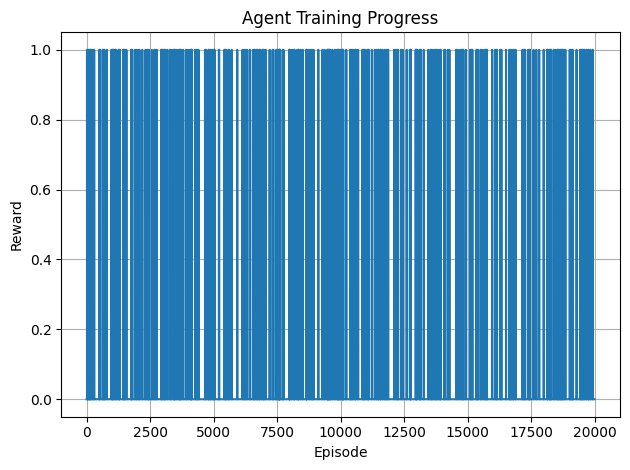


Q-table after training:
[[0.7351 0.7738 0.7738 0.7351]
 [0.7351 0.     0.8145 0.7738]
 [0.7738 0.8574 0.7738 0.8145]
 [0.8145 0.     0.7738 0.7738]
 [0.7738 0.8145 0.     0.7351]
 [0.     0.     0.     0.    ]
 [0.     0.9025 0.     0.8145]
 [0.     0.     0.     0.    ]
 [0.8145 0.     0.8574 0.7738]
 [0.8145 0.9025 0.9025 0.    ]
 [0.8574 0.95   0.     0.8574]
 [0.     0.     0.     0.    ]
 [0.     0.     0.     0.    ]
 [0.     0.9025 0.95   0.8574]
 [0.9025 0.95   1.     0.9025]
 [0.     0.     0.     0.    ]]

Episode 1
Step 1: state=0, action=1
Step 2: state=4, action=1
Step 3: state=8, action=2
Step 4: state=9, action=1
Step 5: state=13, action=2
Step 6: state=14, action=2
Result: Success

Episode 2
Step 1: state=0, action=1
Step 2: state=4, action=1
Step 3: state=8, action=2
Step 4: state=9, action=1
Step 5: state=13, action=2
Step 6: state=14, action=2
Result: Success

Episode 3
Step 1: state=0, action=1
Step 2: state=4, action=1
Step 3: state=8, action=2
Step 4: state=9, ac

In [ ]:
# Custom reward wrapper with balanced shaping without is_slippery
class RewardWrapper(Wrapper):
    def __init__(self, env):
        super().__init__(env)
        self.last_state = None  # track previous state

    def reset(self, **kwargs):
        state, info = self.env.reset(**kwargs)
        self.last_state = state
        return state, info

    def step(self, action):
        state, reward, terminated, truncated, info = self.env.step(action)
        done = terminated or truncated

        # Mild penalty for each step to encourage efficiency
        reward -= 0.01

        # Reduced penalty for hitting the wall
        if state == self.last_state:
            reward -= 0.2

        # Rewards for episode termination
        if done:
            if reward == 1.0:
                reward = 10.0  # moderate success reward
            else:
                reward = -1.0  # failure penalty

        self.last_state = state
        return state, reward, terminated, truncated, info
    

# Create environment
env = gym.make("FrozenLake-v1", is_slippery=False)

# Environment parameters
num_states = env.observation_space.n
num_actions = env.action_space.n
q_table = np.zeros((num_states, num_actions))

# Hyperparameters
alpha = 0.8           # learning rate
gamma = 0.95          # discount factor
epsilon = 0.99        # initial exploration rate
epsilon_decay = 0.999  # exploration decay
epsilon_min = 0.3   # minimum exploration rate
episodes = 20000       # number of training episodes
max_steps = 100       # max steps per episode

# Track rewards per episode
rewards_per_episode = []

# Training loop
for episode in range(episodes):
    state, _ = env.reset()
    done = False
    total_reward = 0
    steps = 0

    while not done and steps < max_steps:
        action = env.action_space.sample() if np.random.rand() < epsilon else np.argmax(q_table[state])
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        q_table[state, action] += alpha * (
            reward + gamma * np.max(q_table[next_state]) - q_table[state, action]
        )

        state = next_state
        total_reward += reward
        steps += 1

    rewards_per_episode.append(total_reward)

# Plot training progress
plt.plot(rewards_per_episode)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Agent Training Progress")
plt.grid(True)
plt.tight_layout()
plt.show()

# Display Q-table
print("\nQ-table after training:")
print(np.round(q_table, 4))

# Save Q-table to file
with open("q_table.txt", "w", encoding="utf-8") as f:
    f.write("Q-table after training:\n")
    for state in range(q_table.shape[0]):
        row = "\t".join([f"{val:.2f}" for val in q_table[state]])
        f.write(f"State {state}: {row}\n")

# Agent testing with custom reward wrapper
#base_env = gym.make("FrozenLake-v1", is_slippery=False)
#env = RewardWrapper(base_env)

successes = 0
test_episodes = 1000

for episode in range(test_episodes):
    state, _ = env.reset()
    done = False
    steps = 0
    print(f"\nEpisode {episode + 1}")

    while not done and steps < max_steps:
        action = np.argmax(q_table[state])
        print(f"Step {steps + 1}: state={state}, action={action}")
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        steps += 1

    print(f"Result: {'Success' if reward == 1.0 else 'Failure'}")
    if reward == 1.0:
        successes += 1

print(f"\nSuccessful episodes out of {test_episodes}: {successes}")



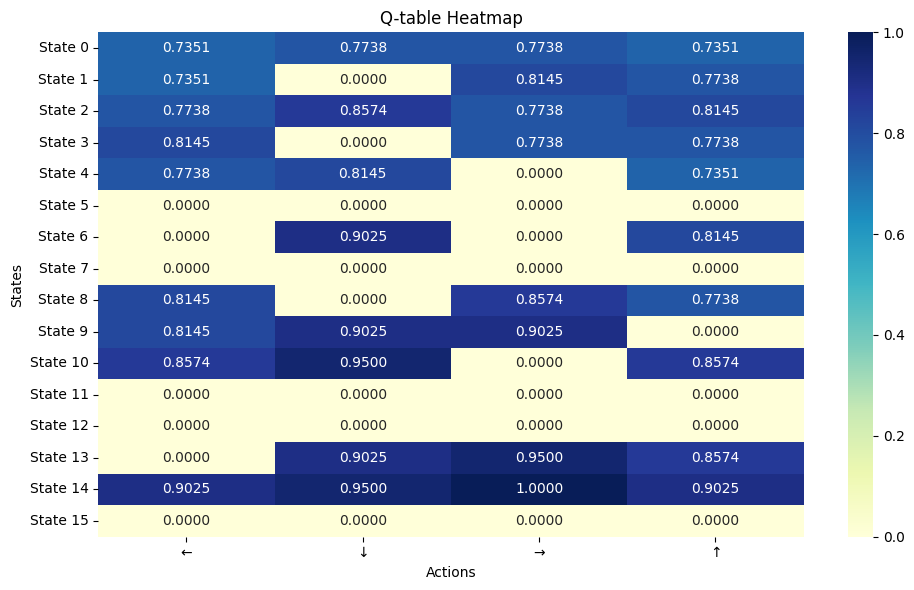

: 

In [ ]:
# Visualization setup
plt.figure(figsize=(10, 6))
sns.heatmap(q_table, annot=True, cmap="YlGnBu", fmt=".4f",
            xticklabels=["←", "↓", "→", "↑"],
            yticklabels=[f"State {i}" for i in range(q_table.shape[0])])
plt.title("Q-table Heatmap")
plt.xlabel("Actions")
plt.ylabel("States")
plt.tight_layout()
plt.show()